In [1]:
from insight_analyzer import *


analyzer = AnomalyAnalyzer(workspace="gartner",result_id="92373081d0e57b417ea374eb8b79a0867d04a9a6")

Ok, first we want to validate the data, if we can run the anomaly scan on it.

Everything seems fine, let's detect the anomalies. Here we want to set up the sensitivity. The lower, the more sensitive the detector will be.

In [2]:
df = analyzer.get_df()

In [3]:

sensitivity = 1
seasonal_ad = PersistAD(c=sensitivity, side="both")
anomalies = seasonal_ad.fit_detect(df)

Now let's plot it, so we can see it!

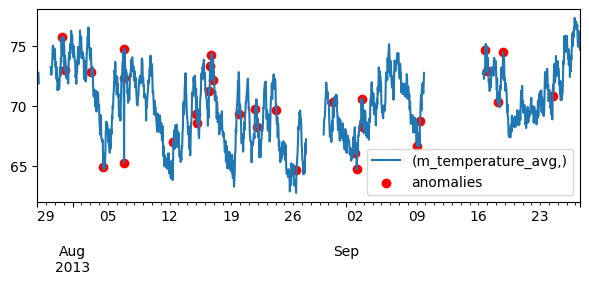

In [4]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = df[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That is meaby a bit too sensitive, let's tone it down a little

In [5]:
sensitivity = 1.5
seasonal_ad = PersistAD(c=sensitivity, side="both")
anomalies = seasonal_ad.fit_detect(df)

Let's see now!

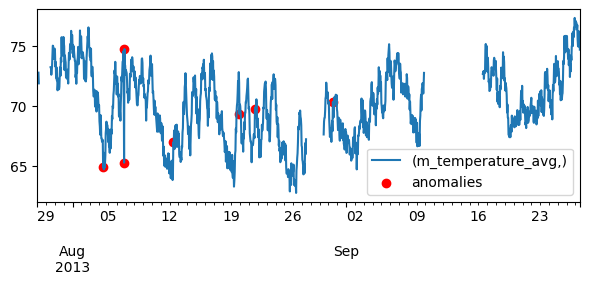

In [6]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = df[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That looks much better, now let's push to it the server, so we can see it in our dashboard

In [7]:
analyzer.push_to_server(anomalies)

{"attribute":["2013-07-28 00:00:00","2013-07-28 01:00:00","2013-07-28 02:00:00","2013-07-28 03:00:00","2013-07-28 04:00:00","2013-07-28 05:00:00","2013-07-28 06:00:00","2013-07-28 07:00:00","2013-07-28 08:00:00","2013-07-28 09:00:00","2013-07-28 10:00:00","2013-07-28 11:00:00","2013-07-28 12:00:00","2013-07-28 13:00:00","2013-07-28 14:00:00","2013-07-28 15:00:00","2013-07-28 16:00:00","2013-07-28 17:00:00","2013-07-28 18:00:00","2013-07-28 19:00:00","2013-07-28 20:00:00","2013-07-28 21:00:00","2013-07-28 22:00:00","2013-07-28 23:00:00","2013-07-29 00:00:00","2013-07-29 01:00:00","2013-07-29 02:00:00","2013-07-29 03:00:00","2013-07-29 04:00:00","2013-07-29 05:00:00","2013-07-29 06:00:00","2013-07-29 07:00:00","2013-07-29 08:00:00","2013-07-29 09:00:00","2013-07-29 10:00:00","2013-07-29 11:00:00","2013-07-29 12:00:00","2013-07-29 13:00:00","2013-07-29 14:00:00","2013-07-29 15:00:00","2013-07-29 16:00:00","2013-07-29 17:00:00","2013-07-29 18:00:00","2013-07-29 19:00:00","2013-07-29 20:00: